In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 1)
df_newcustomers = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 2)
df_demographics = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 3)
df_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 4)


In [5]:
df_transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,2005-05-10
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,2008-03-19
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-21
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,2003-09-09
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,1993-07-15
19996,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,2006-02-02
19997,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02
19998,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25


In [6]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
df_transactions[df_transactions.isnull().any(axis=1)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
20,16725,90,3,2017-06-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2010-05-05
47,19844,3,8,2017-01-28,NaN,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-07-21
58,16095,0,10,2017-11-27,0.0,Approved,NaN,NaN,NaN,NaN,2064.08,NaN,NaT
64,16846,85,11,2017-06-02,NaN,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,2015-08-02
81,8486,0,14,2017-08-16,1.0,Approved,NaN,NaN,NaN,NaN,1084.18,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,18822,30,3464,2017-12-13,NaN,Approved,Solex,Standard,high,medium,748.17,448.90,2002-03-22
19828,10029,66,3468,2017-01-30,NaN,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05
19834,2615,89,3469,2017-11-24,NaN,Approved,WeareA2B,Touring,medium,large,1362.99,57.74,2002-10-10
19879,16744,55,3477,2017-03-23,NaN,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,1998-12-17


In [9]:
df_transactions.online_order.value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [10]:
df_transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,2004-07-31 18:38:13.834267392
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,NaN


In [11]:
df_transactions.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [12]:

df_transactions2 = df_transactions.dropna().copy()

In [13]:
df_transactions2

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,2005-05-10
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,2008-03-19
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-21
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,2003-09-09
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,1993-07-15
19996,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,2006-02-02
19997,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02
19998,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25


In [14]:
df_newcustomers

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.59,0.7375,0.921875,0.783594,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.63,0.6300,0.787500,0.669375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.79,0.7900,0.790000,0.790000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.71,0.8875,0.887500,0.887500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.57,0.5700,0.712500,0.712500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.65,0.6500,0.650000,0.650000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.96,0.9600,1.200000,1.020000,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.78,0.9750,0.975000,0.975000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.53,0.6625,0.662500,0.563125,997,997,0.357000


In [15]:
df_newcustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [16]:
df_newcustomers.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [17]:
df_newcustomers.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [18]:
df_newcustomers2 = df_newcustomers[['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation',  'Rank', 'Value']].dropna().copy()

In [19]:
df_newcustomers2['DOB']= pd.to_datetime(df_newcustomers2['DOB'])

In [20]:
df_newcustomers2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure             

In [21]:
df_demographics

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [22]:
df_demographics.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [23]:
df_demographics[df_demographics.isnull().any(axis = 1)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,3986,Oralle,Petrello,Female,1,1976-12-01 00:00:00,Social Worker,Health,Mass Customer,N,NaN,No,21.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,á,No,7.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [24]:
df_demographics[df_demographics.duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [25]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [26]:
df_demographics['DOB']= pd.to_datetime(df_demographics['DOB'])

In [27]:
df_demographics2 = df_demographics.dropna().drop('default', axis = 1).copy()

In [28]:
df_demographics2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0


In [168]:
df_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [30]:
df_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [31]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [32]:
list = df_demographics.customer_id.unique()
list2 = df_address.customer_id.unique()

for items in list: 
    if items not in list2: 
        print(items)



3
10
22
23


In [33]:
isii = [1,2,3,4]
issi = [2,3,4]
for items in isii: 
    if items not in issi: 
        print(items)


1


##### More data explooration
lets check this questions. 
1. count product bought in transactions(sort by approved and not approved)
2. how many online orders vs non-online orders
3. money made from different product class
4. rank the brands
5. rank all purchases by wealth segment
6. bike sales with area(postcode and state)
7. check industries that will grow in canada there is a chance they would buy more bikes. 

In [70]:
bike_brands = df_transactions2.brand.unique().tolist()
bike_brands

['OHM Cycles',
 'Solex',
 'Trek Bicycles',
 'Norco Bicycles',
 'Giant Bicycles',
 'WeareA2B']

In [78]:

app_trans = df_transactions2.query('order_status== "Approved"')
df_transactions2.query('order_status== "Approved"').brand.value_counts()


brand
Solex             4128
Giant Bicycles    3217
WeareA2B          3215
OHM Cycles        2967
Trek Bicycles     2906
Norco Bicycles    2840
Name: count, dtype: int64

In [76]:
df_transactions2.query('order_status== "Cancelled"').brand.value_counts()

brand
Solex             41
WeareA2B          30
Giant Bicycles    27
OHM Cycles        26
Trek Bicycles     25
Norco Bicycles    23
Name: count, dtype: int64

In [77]:
df_transactions2.online_order.value_counts()

online_order
1.0    9739
0.0    9706
Name: count, dtype: int64

In [79]:
app_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,2005-05-10
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,2008-03-19
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-21
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,2003-09-09
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,1993-07-15
19996,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,2006-02-02
19997,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02
19998,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25


In [80]:
app_trans['profit'] = app_trans['list_price'].sub(app_trans['standard_cost'])

C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_13776\2896000915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_trans['profit'] = app_trans['list_price'].sub(app_trans['standard_cost'])


In [81]:
app_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.070000,2005-05-10,110.560000
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.510000,2008-03-19,751.020000
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-21,189.280000
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.300000,2003-09-09,90.100000
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-09,17.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,1993-07-15,15.080000
19996,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,2006-02-02,583.270000
19997,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02,104.244984
19998,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25,90.100012


In [88]:
app_trans.groupby('product_class').profit.sum()

product_class
high      1.077980e+06
low       1.169544e+06
medium    8.385125e+06
Name: profit, dtype: float64

In [89]:
app_trans.groupby('brand').profit.sum()


brand
Giant Bicycles    1.528709e+06
Norco Bicycles    8.453298e+05
OHM Cycles        1.441780e+06
Solex             2.330943e+06
Trek Bicycles     1.792193e+06
WeareA2B          2.693693e+06
Name: profit, dtype: float64

In [149]:
wealth_segment = [(df_demographics2[df_demographics2.customer_id== id].wealth_segment) for id in app_trans.customer_id]    

In [130]:
try:
    wealth_segment = [(df_demographics2[df_demographics2.customer_id== id].wealth_segment[0]) for id in app_trans.customer_id]    
except KeyError:
    print(id)




999


In [148]:
df_demographics2.wealth_segment = df_demographics2.wealth_segment.astype(str)

In [114]:
app_trans.drop('wealth_segment', axis = 1, inplace = True)

C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_13776\1892777067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_trans.drop('wealth_segment', axis = 1, inplace = True)


In [140]:
wealth_segment = []
for id in app_trans.customer_id:
    temp = df_demographics2[df_demographics2.customer_id== id].wealth_segment.astype(str)

    wealth_segment.append(temp)



In [150]:
type(wealth_segment[1])

pandas.core.series.Series

In [166]:
total_transactions =[(id, len(df_transactions.query(f'customer_id == {id}'))) for id in df_demographics.customer_id] 

In [169]:
total_transactions

[(1, 11),
 (2, 3),
 (3, 8),
 (4, 2),
 (5, 6),
 (6, 5),
 (7, 3),
 (8, 10),
 (9, 6),
 (10, 6),
 (11, 6),
 (12, 7),
 (13, 7),
 (14, 4),
 (15, 6),
 (16, 5),
 (17, 5),
 (18, 7),
 (19, 3),
 (20, 4),
 (21, 5),
 (22, 8),
 (23, 7),
 (24, 8),
 (25, 12),
 (26, 3),
 (27, 7),
 (28, 6),
 (29, 9),
 (30, 3),
 (31, 4),
 (32, 7),
 (33, 7),
 (34, 9),
 (35, 4),
 (36, 2),
 (37, 9),
 (38, 4),
 (39, 12),
 (40, 6),
 (41, 9),
 (42, 4),
 (43, 9),
 (44, 7),
 (45, 3),
 (46, 5),
 (47, 7),
 (48, 8),
 (49, 5),
 (50, 8),
 (51, 8),
 (52, 7),
 (53, 5),
 (54, 7),
 (55, 8),
 (56, 7),
 (57, 6),
 (58, 8),
 (59, 3),
 (60, 2),
 (61, 7),
 (62, 6),
 (63, 3),
 (64, 5),
 (65, 6),
 (66, 5),
 (67, 5),
 (68, 3),
 (69, 6),
 (70, 5),
 (71, 1),
 (72, 5),
 (73, 6),
 (74, 3),
 (75, 8),
 (76, 8),
 (77, 3),
 (78, 2),
 (79, 6),
 (80, 10),
 (81, 4),
 (82, 5),
 (83, 6),
 (84, 7),
 (85, 6),
 (86, 9),
 (87, 9),
 (88, 6),
 (89, 9),
 (90, 7),
 (91, 8),
 (92, 3),
 (93, 3),
 (94, 7),
 (95, 4),
 (96, 4),
 (97, 8),
 (98, 5),
 (99, 9),
 (100, 2),
 (1

In [170]:
total_transactions2 ={id:len(df_transactions.query(f'customer_id == {id}')) for id in df_demographics.customer_id}

In [190]:
len(total_transactions2)

4000

In [173]:
df_demographics2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0


In [188]:
df_demographics['total_transaction'] = total_transactions2.values()

In [189]:
df_demographics

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,total_transaction
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,11
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,3
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,8
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,0


In [206]:
total_profit = app_trans.groupby('customer_id')['profit'].sum()

In [217]:
type(total_profit)

pandas.core.series.Series

In [218]:
customer_id = app_trans['customer_id'].unique()

In [219]:
res = dict(zip(customer_id, total_profit))

In [230]:
len(res)

3490

In [231]:
for id in df_demographics.customer_id:
    df_demographics['total_profit'] = df_demographics['customer_id'].map(res,na_action='ignore')

In [232]:
df_demographics.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,total_transaction,total_profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,11,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,3,2226.26
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,8,3290.21
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,2,220.57
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,6,2394.94
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,5,3946.55
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0,3,220.11
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,10,5364.39
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,6,2353.11
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,6,3358.28


In [233]:
df_demographics.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
total_transaction                        0
total_profit                           511
dtype: int64

In [244]:
df_demographics3 = df_demographics.dropna().copy()

In [239]:
df_demographics.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'total_transaction', 'total_profit'],
      dtype='object')

In [ ]:
df_demographics3 = df_demographics[ 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'total_transaction', 'total_profit']

In [240]:
df_demographics.DOB

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [248]:
from dateutil.relativedelta import relativedelta
from datetime import date

def calculate_age(birth_date):
    today = date.today()
    age = relativedelta(today, birth_date)
    return age.years

df_demographics3['age']= df_demographics3['DOB'].map(lambda x : calculate_age(x))



In [249]:
df_demographics3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,total_transaction,total_profit,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,11,3018.09,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,3,2226.26,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,8,3290.21,69
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,6,2353.11,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,6,3358.28,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,3493,Jeffie,Eakly,Male,30,1964-02-29,Research Assistant I,Health,High Net Worth,N,(ï¾à²¥çà²¥ï¼ï¾ï»¿ â»ââ»,No,18.0,6,3728.88,59
3493,3494,Robers,Richen,Male,72,1998-12-24,Account Representative IV,Argiculture,High Net Worth,N,"'""''''""",No,1.0,4,2755.11,24
3494,3495,Constantine,Frissell,Female,57,1987-07-12,Programmer III,Financial Services,High Net Worth,N,nil,No,8.0,7,3847.65,36
3495,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,âªâªtestâª,Yes,19.0,4,2045.84,37


In [250]:
df_demographics3.gender.unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [252]:
df_demographics3.replace('Male', 1, inplace=True)
df_demographics3.replace(['F', 'Female', 'Femal'], 0, inplace=True)

In [253]:
df_demographics3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,total_transaction,total_profit,age
0,1,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,11,3018.09,69
1,2,Eli,Bockman,1,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,3,2226.26,42
2,3,Arlin,Dearle,1,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,8,3290.21,69
8,9,Mala,Lind,0,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,6,2353.11,50
9,10,Fiorenze,Birdall,0,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,6,3358.28,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,3493,Jeffie,Eakly,1,30,1964-02-29,Research Assistant I,Health,High Net Worth,N,(ï¾à²¥çà²¥ï¼ï¾ï»¿ â»ââ»,No,18.0,6,3728.88,59
3493,3494,Robers,Richen,1,72,1998-12-24,Account Representative IV,Argiculture,High Net Worth,N,"'""''''""",No,1.0,4,2755.11,24
3494,3495,Constantine,Frissell,0,57,1987-07-12,Programmer III,Financial Services,High Net Worth,N,nil,No,8.0,7,3847.65,36
3495,3496,Danya,Burnyeat,1,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,âªâªtestâª,Yes,19.0,4,2045.84,37


In [254]:
df_demographics3.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [255]:
df_demographics3.replace(['Mass Customer', 'Affluent Customer', 'High Net Worth'], [1, 2, 3], inplace=True)


In [256]:
df_demographics3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,total_transaction,total_profit,age
0,1,Laraine,Medendorp,0,93,1953-10-12,Executive Secretary,Health,1,N,"""'",Yes,11.0,11,3018.09,69
1,2,Eli,Bockman,1,81,1980-12-16,Administrative Officer,Financial Services,1,N,<script>alert('hi')</script>,Yes,16.0,3,2226.26,42
2,3,Arlin,Dearle,1,61,1954-01-20,Recruiting Manager,Property,1,N,2018-02-01 00:00:00,Yes,15.0,8,3290.21,69
8,9,Mala,Lind,0,97,1973-03-10,Business Systems Development Analyst,Argiculture,2,N,0/0,Yes,8.0,6,2353.11,50
9,10,Fiorenze,Birdall,0,49,1988-10-11,Senior Quality Engineer,Financial Services,1,N,ð©ð½,Yes,20.0,6,3358.28,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,3493,Jeffie,Eakly,1,30,1964-02-29,Research Assistant I,Health,3,N,(ï¾à²¥çà²¥ï¼ï¾ï»¿ â»ââ»,No,18.0,6,3728.88,59
3493,3494,Robers,Richen,1,72,1998-12-24,Account Representative IV,Argiculture,3,N,"'""''''""",No,1.0,4,2755.11,24
3494,3495,Constantine,Frissell,0,57,1987-07-12,Programmer III,Financial Services,3,N,nil,No,8.0,7,3847.65,36
3495,3496,Danya,Burnyeat,1,99,1986-04-25,Editor,Manufacturing,1,N,âªâªtestâª,Yes,19.0,4,2045.84,37


In [257]:
df_demographics3.replace(['Yes', 'No'], [0, 1], inplace=True)

In [259]:
df_demographics3.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'total_transaction', 'total_profit',
       'age'],
      dtype='object')

In [261]:
df_demographics3 =df_demographics3[['gender',
       'past_3_years_bike_related_purchases', 
        'wealth_segment', 
       'owns_car', 'tenure', 'total_transaction', 'total_profit',
       'age']]

In [262]:
df_demographics3

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,total_transaction,total_profit,age
0,0,93,1,0,11.0,11,3018.09,69
1,1,81,1,0,16.0,3,2226.26,42
2,1,61,1,0,15.0,8,3290.21,69
8,0,97,2,0,8.0,6,2353.11,50
9,0,49,1,0,20.0,6,3358.28,34
...,...,...,...,...,...,...,...,...
3492,1,30,3,1,18.0,6,3728.88,59
3493,1,72,3,1,1.0,4,2755.11,24
3494,0,57,3,1,8.0,7,3847.65,36
3495,1,99,1,0,19.0,4,2045.84,37


c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

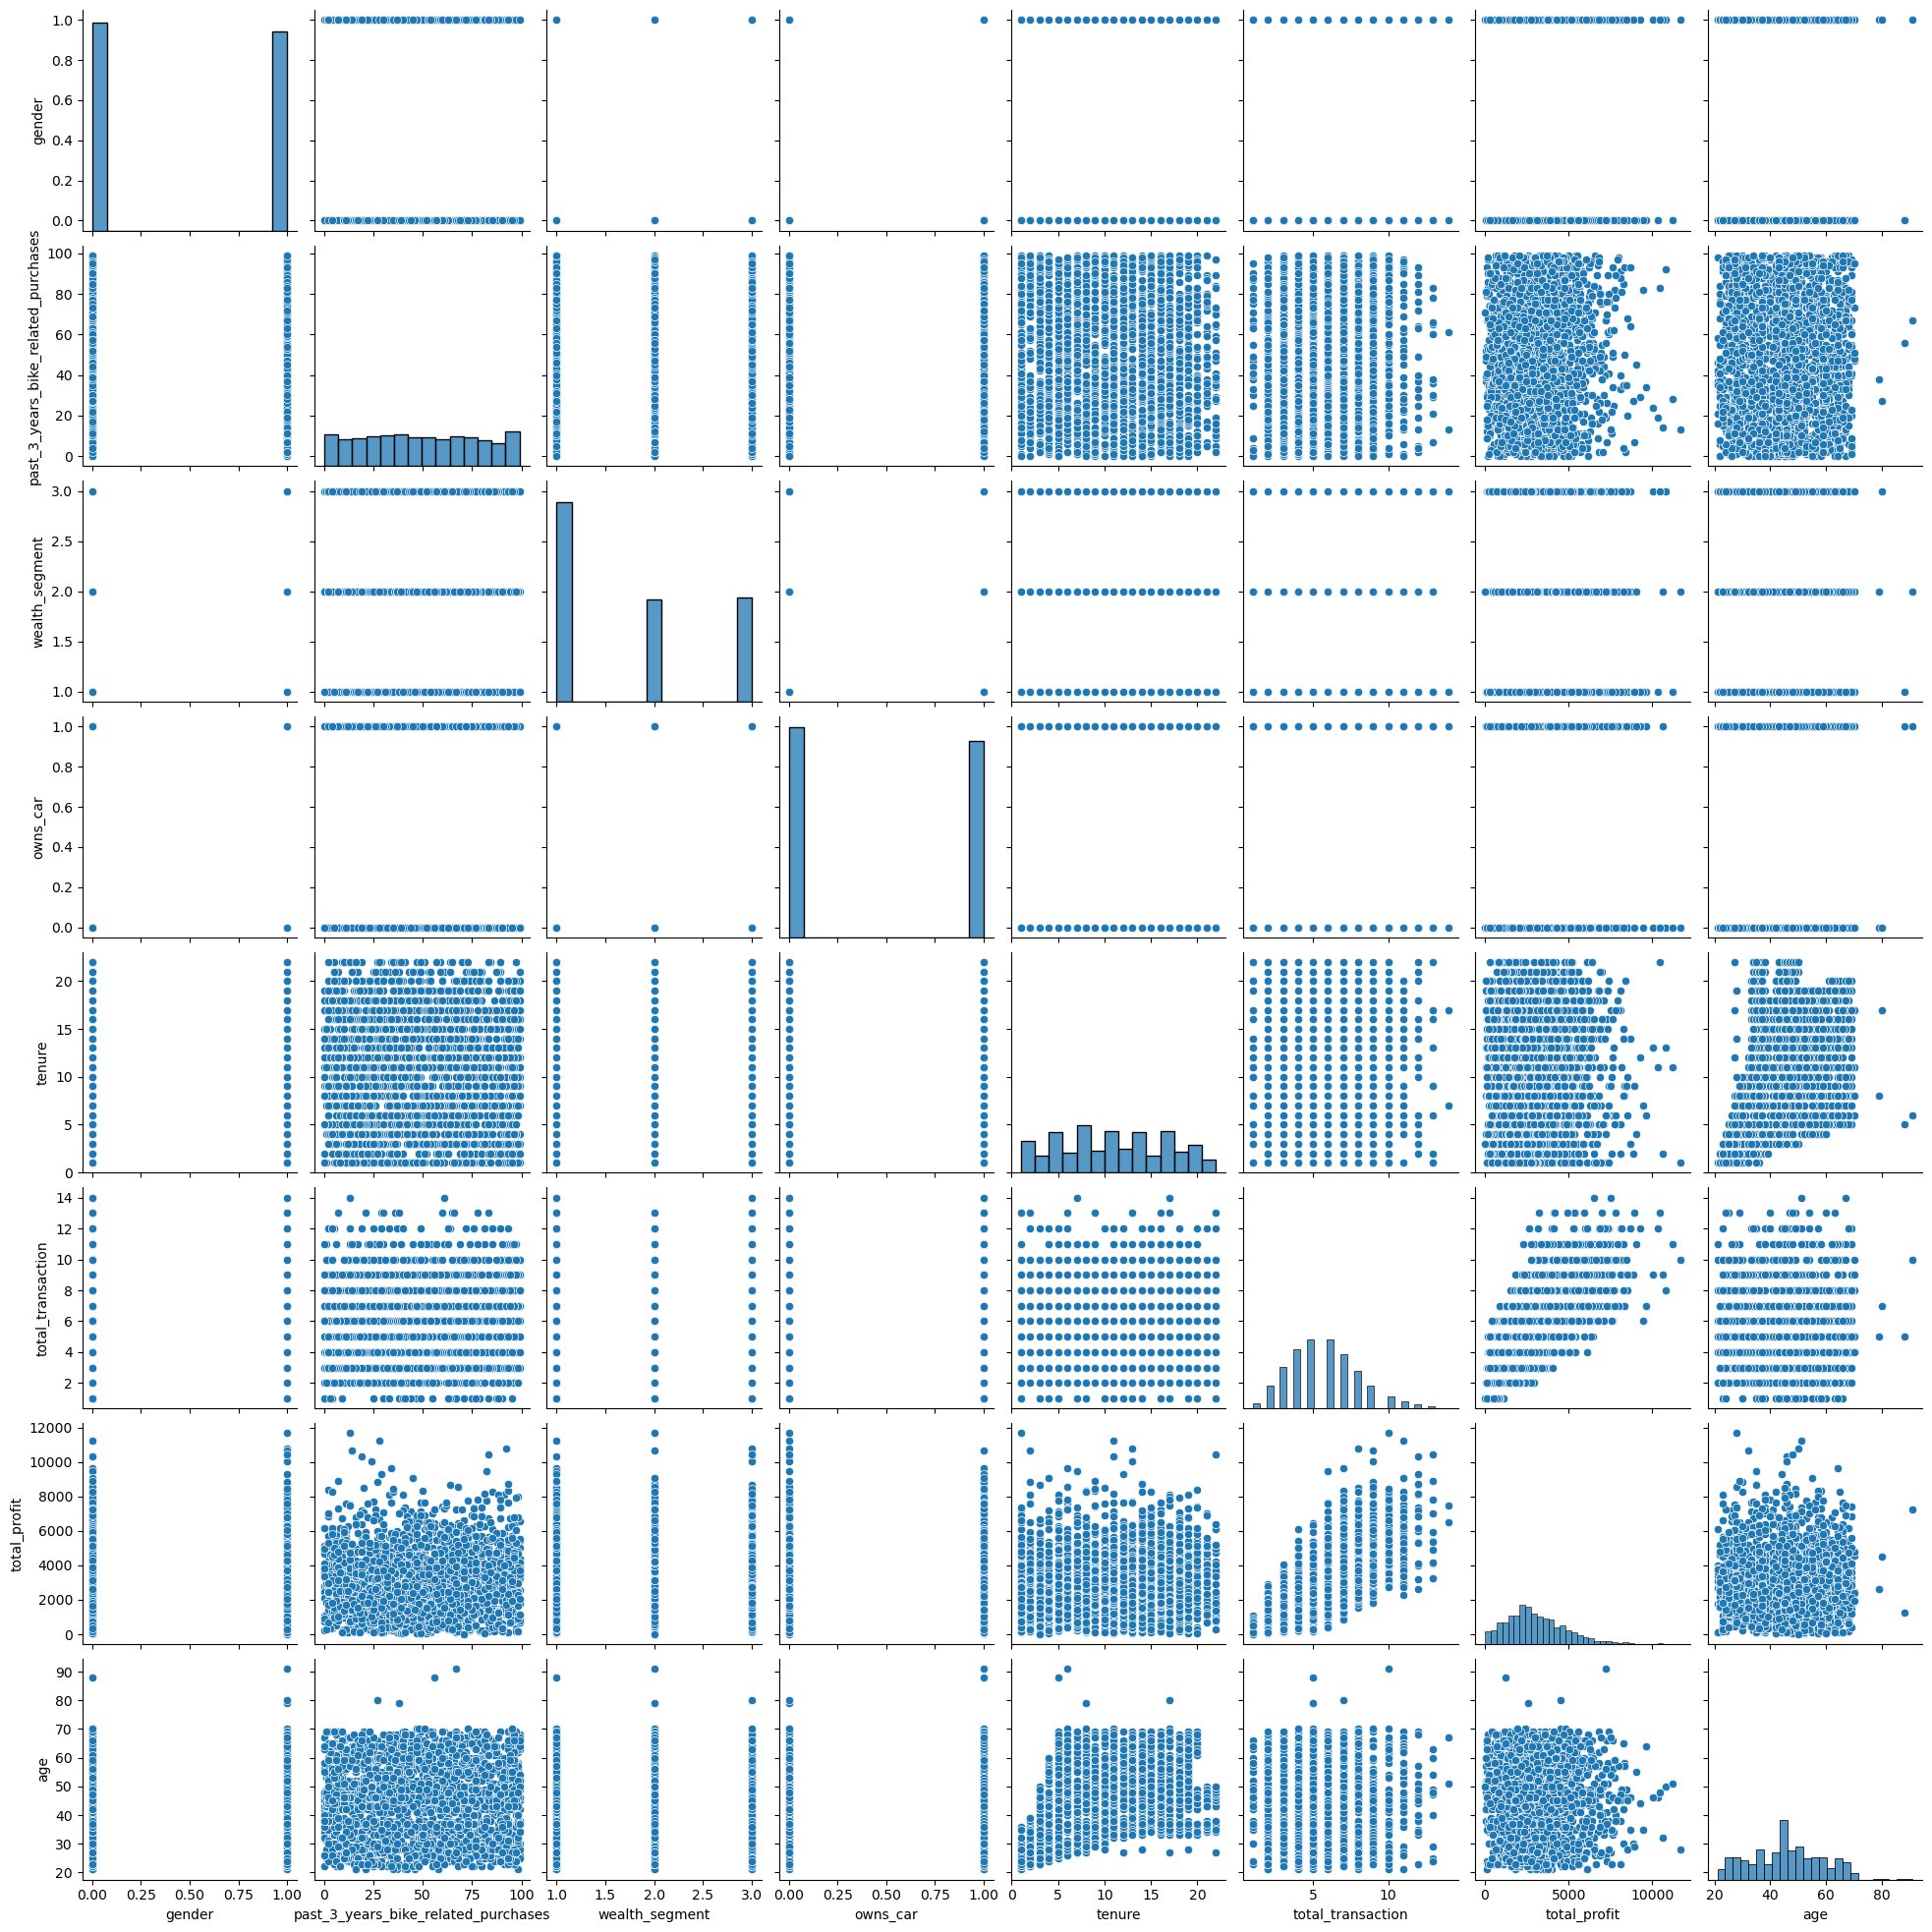

In [318]:
sns.pairplot(df_demographics3)

In [263]:
df_demographics3.corr()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,total_transaction,total_profit,age
gender,1.000000,0.036802,0.003905,0.012599,0.021366,0.008892,0.021235,-0.001884
past_3_years_bike_related_purchases,0.036802,1.000000,-0.022391,-0.013161,-0.021873,0.007811,0.024149,-0.034634
wealth_segment,0.003905,-0.022391,1.000000,-0.018535,0.013493,-0.011681,-0.014696,-0.013696
owns_car,0.012599,-0.013161,-0.018535,1.000000,-0.007993,0.025530,-0.013350,-0.021964
tenure,0.021366,-0.021873,0.013493,-0.007993,1.000000,0.003116,0.018546,0.422544
total_transaction,0.008892,0.007811,-0.011681,0.025530,0.003116,1.000000,0.699810,0.025247
total_profit,0.021235,0.024149,-0.014696,-0.013350,0.018546,0.699810,1.000000,0.006717
age,-0.001884,-0.034634,-0.013696,-0.021964,0.422544,0.025247,0.006717,1.000000


In [266]:
from sklearn.model_selection import train_test_split

In [265]:
y = df_demographics3['total_profit']
x = df_demographics3.drop('total_profit', axis= 1)

In [267]:
def train_test(input_x, input_y):
    return train_test_split(input_x, input_y, test_size = 0.2, random_state = 42)

xtrain, xtest, ytrain, ytest = train_test(x, y)

In [316]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain,ytrain)
a = reg.score(xtest, ytest)


In [295]:
from sklearn import svm

regr = svm.SVR()
regr.fit(xtrain,ytrain)
b = regr.score(xtest, ytest)


In [296]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(xtrain,ytrain)
c = clf.score(xtest, ytest)

In [297]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=42)
regr.fit(xtrain,ytrain)
d = regr.score(xtest, ytest)

In [298]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(5)
knn.fit(xtrain,ytrain)
e = knn.score(xtest, ytest)

In [317]:
accuracy_list = {'algorithm': ['linear', 'support_vector_machine', 'Lasso', 'randomforest', 'Knn_regression'], 
                 'accuracy':[a,b,c,d,e]}
accuracy_pd = pd.DataFrame.from_dict(accuracy_list)
# accuracy_pd.columns = ['algorithm', 'accuracy']
# , columns = ['algorithm', 'accuracy']
accuracy_pd

,algorithm,accuracy
0,linear,0.482138
1,support_vector_machine,-0.005876
2,Lasso,0.482126
3,randomforest,0.482684
4,Knn_regression,0.212939


c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gbadamosi\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='algorithm', ylabel='accuracy'>

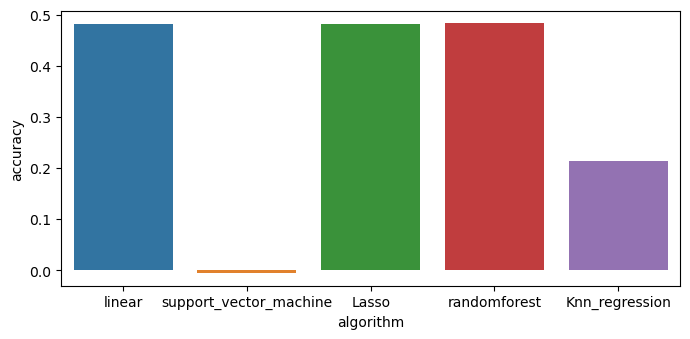

In [326]:
sns.barplot(accuracy_pd, x="algorithm", y="accuracy")

In [302]:
import matplotlib.pyplot as plt

data = {'milk': 60, 'water': 10}
names = list(data.keys)
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [303]:
import matplotlib.pyplot as plt

D = {u'Label1':26, u'Label2': 17, u'Label3':30}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

TypeError: 'numpy.ndarray' object is not callable